# FRONTERA EFICIENTE

## Autor: María Carrasco Meléndez, Raquel Fort Serra y Lucía Saiz Lapique

__Práctica 9 y 10__

__Gestión de Activos y Carteras__

__CUNEF__

En el estudio a continuación, el objetivo es, con los datos estudiados anteriormente, calcular la frontera eficiente, es decir, el conjunto de las carteras más eficientes del mercado, teniendo en cuenta el mayor rendimiento posible con la menor cantidad de riesgo que supongan.

Se ha decidido llevar a cabo este estudio (y el de las estrategias a plantear) con esta herramienta (Python), pues debido al resto de trabajos ejecutados en el curso, tenemos más soltura con este lenguaje que con Excel. 

En primer lugar, cargamos las librerias necesarias y los datos recogidos después del análisis estratéico en cuestión.

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr
import seaborn as sns

Los modelos de predicción estudiados han sido los siguientes y se introducen en este mismo orden: 
* Cross sectional momentum a diferentes horizontes de inversion.
* Contraria.
* Ranking por ratios fundamentales
* Ranking por preferencias de analistas
* Ranking por sentimientos

In [77]:
estrategia1 = pd.read_csv('Estrategia_Value_final.csv')
estrategia2 = pd.read_csv('Estrategia_Quality_final.csv')
estrategia3 = pd.read_csv('Estrategia_Low_Beta_final.csv')
estrategia4 = pd.read_csv('Estrategia_Recommendation_final.csv')
estrategia5 = pd.read_csv('Estrategia_size_final.csv')
estrategia6 = pd.read_csv('Estrategia_Momentum_final.csv')

In [79]:
estrategia1['Quality'] = estrategia2['Quality']
estrategia1['Beta'] = estrategia3['Beta']
estrategia1['Recommendation'] = estrategia4['Recommendation']
estrategia1['Risk Premia Size'] = estrategia5['Risk Premia Size']
estrategia1['Momentum'] = estrategia6['Momentum']
datos = estrategia1
datos.head()

,Date,Value,Quality,Beta,Recommendation,Risk Premia Size,Momentum
0,2012-04-19,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,2012-04-20,99.879487,101.300793,100.375642,99.873694,99.926390,99.641168
2,2012-04-23,101.469698,103.570551,100.675748,100.118175,100.047291,100.274343
3,2012-04-24,100.878603,102.033450,100.510259,98.974253,100.205512,98.758745
4,2012-04-25,99.577627,101.393452,100.730215,99.049022,99.880775,97.771023


En las 5 primeras líneas de la base de datos importada, vemos las estrategias generada para cada activo en el orden en el que se han estudiado anteriormente en otros notebooks de Jupyter. Graficamos las 6 estrategias para estudiar, de forma visual, el desempeño de cada una. 

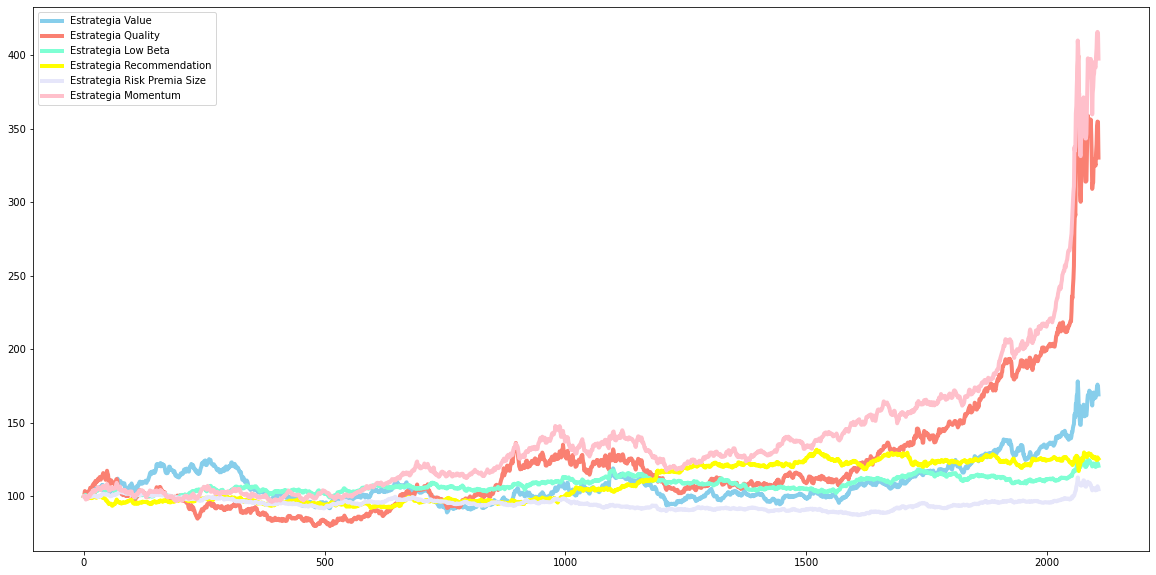

In [80]:
plt.figure(figsize=(20,10))
plt.plot(datos.index, datos['Value'], marker='', markerfacecolor='blue', markersize=12, color='skyblue', 
         linewidth=4, label = 'Estrategia Value')
plt.plot(datos.index, datos['Quality'], marker='', markerfacecolor='salmon', markersize=12, color='salmon', 
         linewidth=4, label = 'Estrategia Quality')
plt.plot(datos.index, datos['Beta'], marker='', markerfacecolor='aquamarine', markersize=12, color='aquamarine',
         linewidth=4, label = 'Estrategia Low Beta')
plt.plot(datos.index, datos['Recommendation'], marker='', markerfacecolor='yellow', markersize=12, color='yellow', 
                  linewidth=4, label = 'Estrategia Recommendation')
plt.plot(datos.index, datos['Risk Premia Size'], marker='', markerfacecolor='lavender', markersize=12, color='lavender', 
         linewidth=4, label = 'Estrategia Risk Premia Size')
plt.plot(datos.index, datos['Momentum'], marker='', markerfacecolor='pink', markersize=12, color='pink', 
                  linewidth=4, label = 'Estrategia Momentum')
plt.legend()

Previo a la generación de la cartera óptima y basándonos únicamente en la comparación gráfica de cada estrategia, podemos concluir que:
* No existe ninguna estrategia que tenga tendencia bajista
* Todas las estrategias muestran ser neutrales a mercado en todo su historial, a excepción de las estrategias de Momentum y de Quality, que tienen un pico pronunciado en los últimos meses.
* Estas dos últimas estrategias muestran mayor rentabilidad a priori (crecen considerablemente) pero son más volátiles.

In [81]:
datos = datos.set_index('Date')
datos.head()

,Value,Quality,Beta,Recommendation,Risk Premia Size,Momentum
Date,,,,,,
2012-04-19,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2012-04-20,99.879487,101.300793,100.375642,99.873694,99.926390,99.641168
2012-04-23,101.469698,103.570551,100.675748,100.118175,100.047291,100.274343
2012-04-24,100.878603,102.033450,100.510259,98.974253,100.205512,98.758745
2012-04-25,99.577627,101.393452,100.730215,99.049022,99.880775,97.771023


## Dar peso a cada modelo

A continuación, generamos una nueva base de datos que mantenga la fecha como índice y que calcule el rendimiento diario en comparación con el día anterior para cada variable.

In [82]:
df = datos.pct_change().dropna()

In [83]:
df.tail()

,Value,Quality,Beta,Recommendation,Risk Premia Size,Momentum
Date,,,,,,
2020-05-12,0.007621,0.017663,0.005260,-0.007714,0.007995,0.012383
2020-05-13,0.024702,0.037591,0.010394,0.002295,0.008331,0.026775
2020-05-14,0.007646,0.007942,-0.005911,0.012336,0.006464,0.001672
2020-05-15,-0.005454,-0.000631,0.000846,-0.004652,-0.006428,-0.001744
2020-05-18,-0.032645,-0.068529,-0.012526,-0.003413,-0.013108,-0.042008


Como primer parámetro que debemos introducir, consideramos que la mejor manera de seleccionar los pesos de cada estrategia es asignándole a cada acción un peso proporcional al precio que tiene cada una de ellas en el último día de los datos históricos (en este caso, los datos de cada estrategia). Por tanto, calculamos el valor mas reciente del precio total invertido por todas las estrategias y los pesos adjudicados a cada uno seria el porcentaje resultando del precio de cada accion entre el precio total de la cartera. 

In [84]:
total = datos['Value'][-1] + datos['Quality'][-1] + datos['Recommendation'][-1] + datos['Momentum'][-1] + datos['Beta'][-1] + datos['Risk Premia Size'][-1]

In [89]:
#Creamos matriz de pesos para cada activo ("Equally weighted")
weights = [datos['Value'][-1]/total, datos['Quality'][-1]/total, datos['Beta'][-1]/total,
           datos['Recommendation'][-1]/total,  
           datos['Risk Premia Size'][-1]/total, datos['Momentum'][-1]/total]

A continuación generamos una cartera de base con los pesos seleccionados, donde podemos ver su rendimiento esperado según esos pesos  y los pesos activos seleccionados.

In [90]:
n_assets = len(df.columns)
w = np.array(weights)
r = np.array(np.mean(df))
C = np.cov(df.transpose())

#Validamos
print("Rendimiento esperado:", r)
print("Pesos activos:", w)

Rendimiento esperado: [2.88896857e-04 6.39482716e-04 9.87281009e-05 1.18539361e-04
 2.65471569e-05 6.92948874e-04]
Pesos activos: [0.13563203 0.2646279  0.0967337  0.10052628 0.08392847 0.31855162]


## Correlaciones con activos tradicionales

Generamos a continuación la matriz de correlaciones entre cada estrategia, además de un mapa de calor (heatmap), donde es posible observar estas correlaciones de forma mucho más visual.

In [91]:
cov = pd.DataFrame(C, columns = ['Value', 'Quality', 'Beta', 'Recommendation', 'Risk Premia Size', 'Momentum'])   #,'Sentiment'])
cov.index = ['Value', 'Quality', 'Beta', 'Recommendation', 'Risk Premia Size', 'Momentum']
print('Matriz de covarianzas:')
cov

Matriz de covarianzas:


,Value,Quality,Beta,Recommendation,Risk Premia Size,Momentum
Value,0.000078,0.000068,0.000015,2.469024e-06,5.485200e-06,0.000051
Quality,0.000068,0.000145,0.000012,8.714999e-06,8.735001e-06,0.000083
Beta,0.000015,0.000012,0.000019,-2.279121e-06,1.955448e-06,0.000012
Recommendation,0.000002,0.000009,-0.000002,2.181408e-05,5.873059e-07,0.000001
Risk Premia Size,0.000005,0.000009,0.000002,5.873059e-07,9.138591e-06,0.000006
Momentum,0.000051,0.000083,0.000012,1.240482e-06,5.818142e-06,0.000076


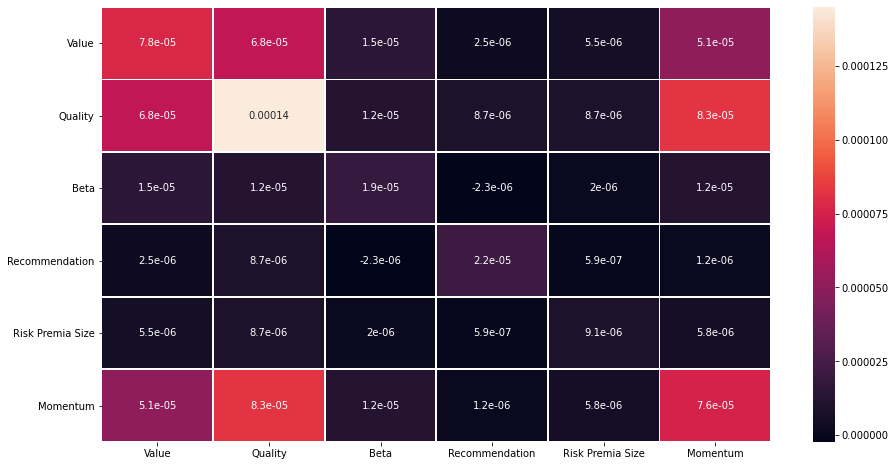

In [92]:
plt.figure(figsize = (15,8))
ax = sns.heatmap(cov, linewidth=0.8, annot = True)
plt.show()

Como podemos observar en esta matriz de correlaciones, las estrategias están muy poco correlacionadas (correlaciones muy cercanas a 0) y entre las que existe una pequeña correlación, no muestran mucha importancia. Las únicas correlaciones positivas que existen son entre las estrategias de value y de quality, y entre quality y momentum. 

## Calcular el rendimiento de la cartera agregada por modelo junto con su volatilidad asociadas

Estudiamos además la contribución del riesgo a cada estrategia y lo comparamos con su rendimiento.

In [93]:
def risk_contribution(w, C):
    """
    Compute the contributions to risk of the constituents of a portfolio, given a set of portfolio weights and a covariance matrix
    """
    port_variance = np.dot(w.T, np.dot(C, w))
    # Marginal contribution of each constituent
    marginal_contrib = C@w
    risk_contrib = np.multiply(marginal_contrib,w.T)/port_variance
    return risk_contrib

In [94]:
risk_contrib = risk_contribution(w, C)
risk_contrib

array([0.1379489 , 0.44021577, 0.02242887, 0.01103617, 0.01079171,
       0.37757859])

In [95]:
rend = w * r * 252
rend

array([0.00987428, 0.04264469, 0.00240668, 0.00300291, 0.00056147,
       0.05562648])

In [97]:
rendimiento = pd.DataFrame(rend, columns = ['Rendimiento'], index = ['Value', 'Quality', 'Beta', 'Recommendation', 'Risk Premia Size', 'Momentum'])   #, 'Ratios','Sentiment'])
rendimiento['Riesgo'] = risk_contrib.tolist()
rendimiento

,Rendimiento,Riesgo
Value,0.009874,0.137949
Quality,0.042645,0.440216
Beta,0.002407,0.022429
Recommendation,0.003003,0.011036
Risk Premia Size,0.000561,0.010792
Momentum,0.055626,0.377579


En el gráfico a continuación, se puede observar una comparación del rendimiento y los riesgos de cada activo con las distintas estrategias por separado. 

Observamos que:
* Todas las estrategias tienen mucha volatilidad en comparación con el rendimiento que aportan 
* Como hemos supuesto anteriormente, la estrategia de risk premia size es la que menos volatilidad tiene, aunque su rendimiento también es el más bajo de todas las estrategias.
* Las 6 estrategias dan rendimiento positivo.
* La estrategia más arriesgada o volátil es la de quality, siendo también la que mayor rentabilidad aporta, muy seguida de la de momentum.

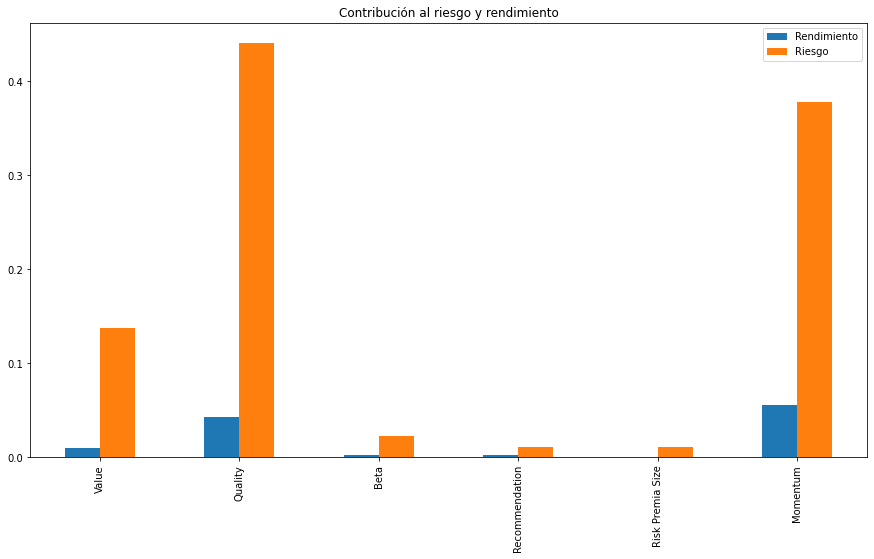

In [98]:
rendimiento.plot.bar(title = "Contribución al riesgo y rendimiento", figsize = (15, 8))

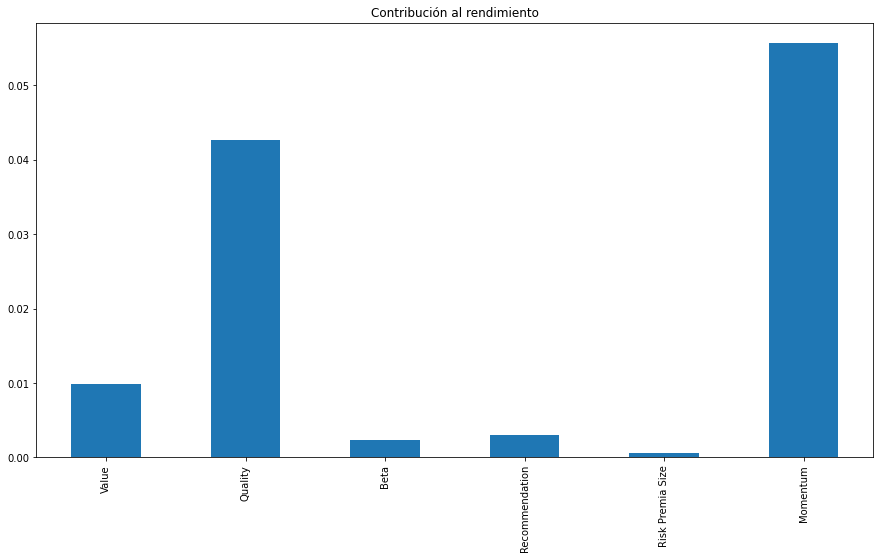

In [99]:
rendimiento.Rendimiento.plot.bar(title = "Contribución al rendimiento", figsize = (15, 8))

## Generación de la cartera

A continuación, se incluyen una serie de funciones para calcular el rendimiento anualizado del portfolio, la desviación estandar anualizada del portfolio (el riesgo), el ratio de Sharp, donde podemos alterad el rendimiento deseado (en este caso se ha seleccionado 0.1, aunque no es muy alto, porque era el valor máximo de rendimiento con el cual se mantenía positivo el ratio de Sharpe), los portfolios aleatorios para graficar y la tangente con la frontera eficiente.

In [103]:
def mu(w,r):
    '''Rendimiento portfolio anualizado'''
    return sum(w * r * 252) 


def sigma(w, C):
    '''Desv STD portadolio anualizada'''
    return np.dot(w,np.dot(C,w.T)) ** (1/2) * 252 ** (1/2)


def sharpe(w):
    '''Sharpe ratio con rf de 10%'''
    '''CAMBIAR RENDIMIENTO AQUI'''
    rf = .10
    return (mu(w,r) - rf) / sigma(w,C)


def neg_sharpe(w):
    '''Sharpe ratio negativo'''
    return -sharpe(w)


def random_ports(n):
    '''Portfolios aleatorios'''
    means, stds = [],[]
    for i in range(n):
        rand_w = np.random.rand(len(df.columns))
        rand_w = rand_w / sum(rand_w)
        means.append(mu(rand_w, r))
        stds.append(sigma(rand_w,C))
    
    return means, stds

In [101]:
np.random.rand(len(df.columns))

array([0.91300051, 0.29726999, 0.51144809, 0.13524194, 0.22533518,
       0.47084279])

Un portafolio "Equally weighted" tendría un Sharpe Ratio de:

In [104]:
print("Sharpe port equal w:", round(sharpe(w),2))

Sharpe port equal w: 0.13


Con el código a continuación, generamos los pesos óptimos de nuestra cartera, donde podemos indicar si solicitaoms pesos mínimos o máximos para cualquiera de las acciones incluidas en nuestra cartera. En este caso, se selecciona que haya al menos un 5% de representación de cada acción en la cartera total, pues si no se selecciona un mínimo, la función elige invertir unicamente en dos de ellas y deseamos que esté diversificada. Además, incluimos también un máximo, para que no haya tanto desbalanceo, pero de todas formas hay dos estrategias principales con mayor peso (las que tienen mayor riesgo pero mayor rentabilidad: momentum y recomendación).

En el resumen a continuación, al final del todo, nombrados con una x, vemos la selección de pesos óptimos que ha realizado la función con los parámetros introducidos:[0.05, 0.3 , 0.05, 0.05, 0.05, 0.5 ])

In [106]:
import scipy.optimize as optimize

def apply_sum_constraint(inputs):
    total = 1 - np.sum(inputs)
    return total

my_constraints = ({'type': 'eq', "fun": apply_sum_constraint })


result = optimize.minimize(neg_sharpe, 
                      w,
                      method='SLSQP', 
                      bounds=((0.05, 0.5), (0.05, 0.5), (0.05, 0.5), (0.05, 0.5), (0.05, 0.5), (0.05, 0.5)),
                      options={'disp': True},
                      constraints=my_constraints)
print(result)
optimal_w = result["x"]

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.3347116640031923
            Iterations: 2
            Function evaluations: 16
            Gradient evaluations: 2
     fun: -0.3347116640031923
     jac: array([-0.30801839, -0.80101252, -0.13774026, -0.2130137 , -0.01922344,
       -1.03159097])
 message: 'Optimization terminated successfully.'
    nfev: 16
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.05, 0.3 , 0.05, 0.05, 0.05, 0.5 ])


Por último, generamos un gráfico que muestre 10000 las carteras aleatorias generadas, que seleccione la que considera la mejor (en base a un rendimiento y riesgo óptimos que observamos sobre el gráfico) y muestre la frontera eficiente.

El rendimiento de la cartera óptima es 0.142 y su volatilidad es 0.127


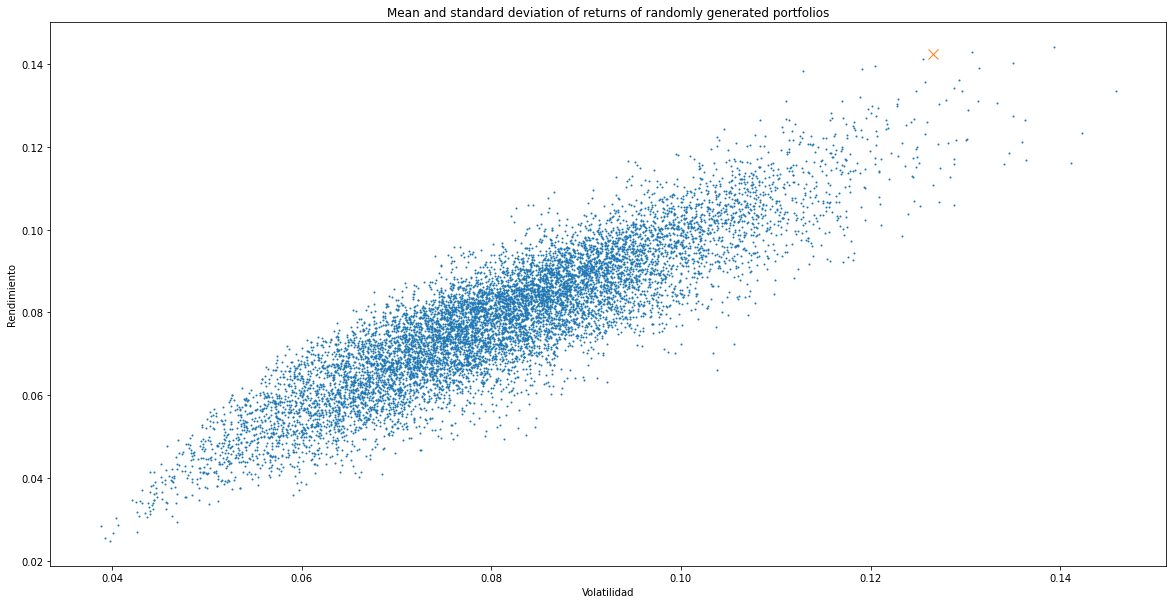

In [107]:
#Grafiquemos
n_portfolios = 10000   # generamos 10000 carteras aleatorias
means, stds = random_ports(n_portfolios) # generamos rendimientos y riesgos aleatorios

best_mu = mu(optimal_w, r) 
best_sigma = sigma(optimal_w, C)
best_sharpe = sharpe(optimal_w) ## la mejor cartera se seleccionara en base a los pesos óptimos, los renidmientos y el riesgo
# introducidos anteriormente
plt.figure(figsize=(20,10))
plt.plot(stds, means, 'o', markersize=1)
plt.plot(best_sigma, best_mu, 'x',  markersize=10)
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')
print('El rendimiento de la cartera óptima es', round(best_mu, 3), 'y su volatilidad es', round(best_sigma, 3))

## Correlaciones con modelos de regresión.

Para terminar el estudio, creamos una nueva variable con la cartera final aplicando la combinación de todas las estrategias en base a los pesos óptimos y la comparamos con ellas.

In [108]:
cartera = datos*optimal_w
cartera['Cartera Final'] = cartera.sum(axis = 1)
cartera

,Value,Quality,Beta,Recommendation,Risk Premia Size,Momentum,Cartera Final
Date,,,,,,,
2012-04-19,5.000000,30.000000,5.000000,5.000000,5.000000,50.000000,100.000000
2012-04-20,4.993974,30.390238,5.018782,4.993685,4.996319,49.820584,100.213583
2012-04-23,5.073485,31.071165,5.033787,5.005909,5.002365,50.137172,101.323883
2012-04-24,5.043930,30.610035,5.025513,4.948713,5.010276,49.379372,100.017839
2012-04-25,4.978881,30.418036,5.036511,4.952451,4.994039,48.885511,99.265429
...,...,...,...,...,...,...,...
2020-05-12,8.519694,101.767257,6.080607,6.232292,5.262804,202.093733,329.956388
2020-05-13,8.730146,105.592813,6.143810,6.246594,5.306650,207.504855,339.524868
2020-05-14,8.796899,106.431471,6.107495,6.323651,5.340954,207.851895,340.852365


En la tabla a continuación, se puede observar la correlación existente entre nuestra cartera generada y cada estrategia. Observamos que la mayor correlación a la cartera final es con la estrategia de momentum que, anteriormente, se había analizado como la segunda más rentable pero también la segunda más volátil, y que es la que más peso tiene en la cartera. Cabe mencionar también que la menor correlación es con la estrategia de risk premia size (con los índices), a pesar de que tiene la misma representación en nuestra cartera óptima que las de value, beta y recommendation. La estrategia de recomendaciones de brokers y la de la beta, aunque superiores a 0.5, no llegan a ser de importancia (mayores que 0.9). 

In [109]:
correlaciones = cartera.corr()
correlaciones['Cartera Final']

Value               0.838911
Quality             0.993226
Beta                0.749707
Recommendation      0.608446
Risk Premia Size    0.304001
Momentum            0.997745
Cartera Final       1.000000
Name: Cartera Final, dtype: float64

Para finalizar estas comparaciones y el análisis de correlación, graficamos la cartera generada en comparación con las tres estrategias con las que mayor correlación coparte y que mayor peso tienen en su generación:

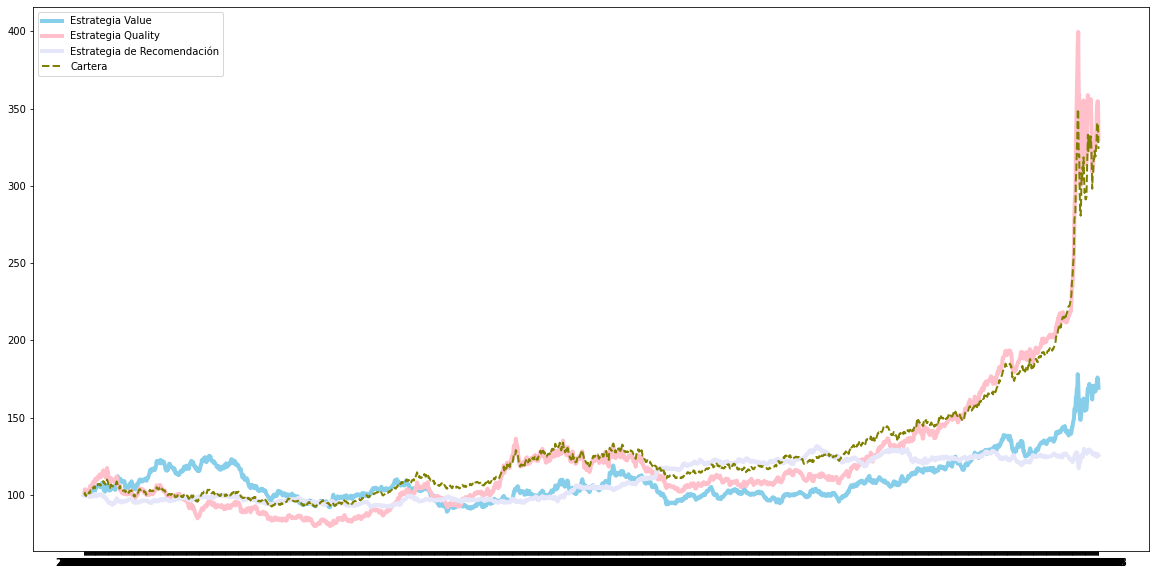

In [110]:
plt.figure(figsize=(20,10))
plt.plot(datos['Value'], marker='', markerfacecolor='blue', markersize=12, color='skyblue', 
         linewidth=4, label = 'Estrategia Value')
plt.plot(datos['Quality'], marker='', markerfacecolor='pink', markersize=12, color='pink', 
         linewidth=4, label = 'Estrategia Quality')
plt.plot(datos['Recommendation'], marker='', markerfacecolor='lavender', markersize=12, color='lavender', 
         linewidth=4, label = 'Estrategia de Recomendación')
plt.plot(cartera['Cartera Final'], marker='', color='olive', linewidth=2, linestyle='dashed', label="Cartera")
plt.legend()

## Conclusiones sobre la metodología

Como conclusión, añadimos que:
* Al aplicarle mayor peso en largo que en corto a todas las estrategias, los resultados han sido mucho más positivos
* Se consigue que todas las estrategias sean neutrales a mercado por los pesos aplicados (a excepción de los últimos meses donde hay un pico muy alto)
* Todas las estrategias siguen una tendencia de crecimiento muy similar debido a los pesos seleccionados para cada una, aunque destacan la estrategia de Quality y la de Momentum por su incremento pronunciado en los últimos meses.
* La cartera final es capaz de aumentar sus beneficios por más del triple del valor inicial (empieza con 100€ de inversión y finaliza con unos 330€) 
* El alto número de activos y la diversificación de la cartera en numerosas estrategias permite una creación de cartera basada en valores más reales a mercado y teniendo en cuenta diversos factores que influyen en la volatilidad.

La metodología de combinar varias estrategias con procedimientos completamente distintos resulta ser muy positiva a la hora de diversificar la cartera y protegerse frente un mercado muy volátil. Al tener en cuenta factores como rentabilidad propia de la empresa, ratios contables y perspectivas externas a la empresa (índices macroeconómicos y recomendaciones de analistas), el estudio es muy amplio y se cubren aspectos tanto externos como internos. Esto permite que la cartera en cuestión esté preparada para asumir riesgos de ambos ámbitos.

## Ventajas y desventajas de cada modelo aplicado

* __Momentum__: Esta estrategia, aunque muy volátil, aporta el segundo mayor rendimiento de todas. Los pesos son muy fáciles de seleccionar, aunque se debe tener en cuenta el resultado (prueba y error, más eficiente si se hiciera ocn train y test). Además, se tienen en cuenta muchas rentabilidades distintas a distintos plazos que permiten especificar más la importancia del corto y largo plazo según los activos que aportan mayor rendimiento en uno u otro. Esta estrategia, junto con la contraria, muestran un estudio principalmente interior de cada empresa.

* __Recomendaciones de analistas__: Ventajas: que es recogida de informacion de expertos y hay muchos de ellos. Aportanfo información más allá de los criterios objetivos del mercado. Además, se pueden obtener rentabilidades anormales significativas siguiendo las recomendaciones de los analistas, aunque son más evidentes las ganancias asociadas a los cambios de las recomendaciones. Por otra parte, se aporta evidencia a favor de que las recomendaciones y cambios en las mismas emitidos por las agencias de valores también tienen influencia sobre el precio de los activos. Como desventaja mencionar que pueden diferir mucho unos de otro en opiniones, por lo que es importante saber cuáles se comportan mejor, hacer un seguimiento exahustivo de los mismo además de las compañías

* __Value__: Este tipo de inversion suele estar vinculado a un comportamiento cíclico, estas acciones suelen comportarse mejor cuando la economia esta en crecimiento, suele atender más a los fundamentales y suele pagar más a aquellas valoraciones. Cuando hay aversión al riesgo o hay momentos de recesión no van a funcionar tan bien. Esta estrategia está muy vinculada a la de Quality. 

* __Quality__: Esta estrategia, aunque muy volátil, aporta el mayor rendimiento de todas.  Los mercados más adversos para este estilo suele ser en periodos de recuperación tras una crisis sobre todo de solvencia; en estas situaciones, el mercado puede castigar a estas acciones con más calidad, y las compañías de mala calidad suelen experimentar fuertes revalorizaciones (junk rally). 

* __Low Beta__: Esta estrategia permite conocer el valor de las empresas a través de la sensibilidad de movimiento a un índice y permite ordenar a estas empresas de menor a mayor estableciendo un ranking. Es una manera sencilla de ponderar a las empresas pero no tiene en cuenta otras muchas variables que son relevantes para establecer este orden de preferencias.

* __Size__: Esta estrategia tiene en cuenta la capitalización bursátil a la hora de establecer un ranking de acciones, esto resulta determinante ya que tendremos en cuenta el valor patrimonial de la empresa. No podemos establecer pesos muy altos en acciones en el corto ya que la beta o sensibilidad al movimiento se4ría muy pequeña y viceversa, habría que tener en cuenta su valor nominal.

__Bibliografía:__

* https://www.linkedin.com/pulse/frontera-eficiente-en-python-oscar-rojas-cfa
* http://amarjen.github.io/dibujar-frontera-eficiente.html#.XqR0ImgzZPY